In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_columns', None) # To show all columns
pd.set_option('display.width', None)       # To ensure wide DataFrames are not wrapped

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = '/content/drive/MyDrive/NYC_property_sales_regression/nyc_property_sales.csv'
df = pd.read_csv(file_path)

/tmp/ipython-input-4153876590.py:2: DtypeWarning: Columns (0,4,5,6,10,11,12,13,14,15,16,17,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [5]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,374,46,NaN,A4,347 EAST 4TH STREET,NaN,10009.0,1.0,0.0,1.0,2116.0,4400.0,1900.0,1,A4,399000,2022-09-29 00:00:00
1,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,377,1,NaN,S2,110 AVENUE C,NaN,10009.0,2.0,1.0,3.0,1502.0,2790.0,1901.0,1,S2,2999999,2022-09-15 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,373,16,NaN,C1,326 EAST 4TH STREET,NaN,10009.0,10.0,0.0,10.0,2204.0,8625.0,1899.0,2,C1,16800000,2022-08-04 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,373,17,NaN,C1,328 EAST 4TH STREET,NaN,10009.0,10.0,0.0,10.0,2204.0,8625.0,1900.0,2,C1,16800000,2022-08-04 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376,54,NaN,C4,"719 EAST SIXTH STREET, 1B",NaN,10009.0,20.0,0.0,20.0,2302.0,9750.0,1900.0,2,C4,158822,2022-09-27 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018044,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1,6970,84,NaN,A1,N/A LENEVAR AVENUE,NaN,10309.0,1.0,0.0,1.0,2603.0,0.0,2022.0,1,V0,1116638,2022-12-19 00:00:00
2018045,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1,6970,85,NaN,A1,N/A LENEVAR AVENUE,NaN,10309.0,1.0,0.0,1.0,2551.0,0.0,NaN,1,V0,1116638,2022-12-19 00:00:00
2018046,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1B,6970,86,NaN,V0,N/A LENEVAR AVENUE,NaN,10309.0,0.0,0.0,0.0,2597.0,0.0,2023.0,1,V0,1116638,2022-12-19 00:00:00
2018047,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1B,6970,87,NaN,V0,96 LENEVAR AVENUE,NaN,10309.0,0.0,0.0,0.0,2644.0,0.0,2023.0,1,V0,1116638,2022-12-19 00:00:00


In [6]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', ' ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018049 entries, 0 to 2018048
Data columns (total 21 columns):
 #   Column                          Dtype 
---  ------                          ----- 
 0   BOROUGH                         object
 1   NEIGHBORHOOD                    object
 2   BUILDING CLASS CATEGORY         object
 3   TAX CLASS AT PRESENT            object
 4   BLOCK                           object
 5   LOT                             object
 6   EASE-MENT                       object
 7   BUILDING CLASS AT PRESENT       object
 8   ADDRESS                         object
 9   APARTMENT NUMBER                object
 10   ZIP CODE                       object
 11  RESIDENTIAL UNITS               object
 12  COMMERCIAL UNITS                object
 13  TOTAL UNITS                     object
 14  LAND SQUARE FEET                object
 15  GROSS SQUARE FEET               object
 16  YEAR BUILT                      object
 17  TAX CLASS AT TIME OF SALE       object
 18  BU

In [8]:
df.isnull().sum()

,0
BOROUGH,0
NEIGHBORHOOD,0
BUILDING CLASS CATEGORY,0
TAX CLASS AT PRESENT,838
BLOCK,0
LOT,0
EASE-MENT,613648
BUILDING CLASS AT PRESENT,838
ADDRESS,0
APARTMENT NUMBER,470673


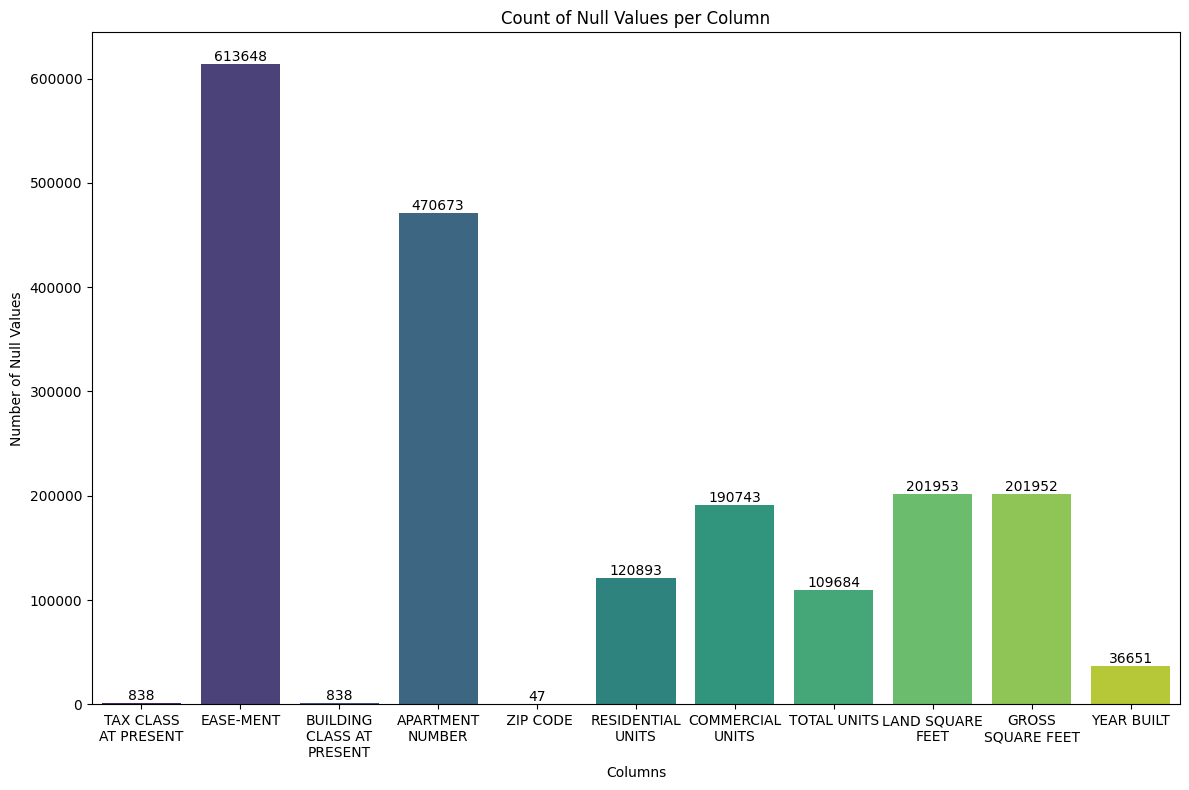

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

# Calculate null values
null_counts = df.isnull().sum()

# Filter out columns with no nulls for better visualization if there are many
null_counts = null_counts[null_counts > 0]

if not null_counts.empty:
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(x=null_counts.index, y=null_counts.values, hue=null_counts.index, palette='viridis', legend=False)

    # Add counts on top of bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge')

    # Wrap x-axis labels
    wrapped_labels = [textwrap.fill(label, 11) for label in null_counts.index]
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(wrapped_labels, rotation=0, ha='center')

    plt.title('Count of Null Values per Column')
    plt.xlabel('Columns')
    plt.ylabel('Number of Null Values')
    plt.tight_layout()
    plt.show()
else:
    print("No null values found in the DataFrame.")

In [10]:
df['BOROUGH'].unique()

array([1, 2, 3, 4, 5, '4', '5', 'BOROUGH', '1', '2'], dtype=object)

In [11]:
df['BOROUGH'].value_counts()

,count
BOROUGH,
4,616579
3,557520
1,463960
5,183265
2,163957
1,17600
4,6374
5,5098
2,3695


In [12]:
df[df['BOROUGH'] == 'BOROUGH']

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
1879248,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASEMENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE


In [13]:
df.drop(index=1879248, errors='ignore', inplace=True)

In [14]:
df[df['BOROUGH'] == 'BOROUGH']

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE


In [15]:
df['BOROUGH'].value_counts()

,count
BOROUGH,
4,616579
3,557520
1,463960
5,183265
2,163957
1,17600
4,6374
5,5098
2,3695


In [16]:
df['BOROUGH'] = pd.to_numeric(df['BOROUGH'], errors='coerce')

In [17]:
df['BOROUGH'].value_counts()

,count
BOROUGH,
4,622953
3,557520
1,481560
5,188363
2,167652


In [18]:
df['NEIGHBORHOOD'].unique()

array(['ALPHABET CITY', 'CHELSEA', 'CHINATOWN', 'CIVIC CENTER', 'CLINTON',
       'EAST VILLAGE', 'FASHION', 'FINANCIAL', 'FLATIRON', 'GRAMERCY',
       'GREENWICH VILLAGE-CENTRAL', 'GREENWICH VILLAGE-WEST',
       'HARLEM-CENTRAL', 'HARLEM-EAST', 'HARLEM-UPPER', 'HARLEM-WEST',
       'INWOOD', 'JAVITS CENTER', 'KIPS BAY', 'LITTLE ITALY',
       'LOWER EAST SIDE', 'MANHATTAN VALLEY', 'MIDTOWN CBD',
       'MIDTOWN EAST', 'MIDTOWN WEST', 'MORNINGSIDE HEIGHTS',
       'MURRAY HILL', 'ROOSEVELT ISLAND', 'SOHO', 'SOUTHBRIDGE',
       'TRIBECA', 'UPPER EAST SIDE (59-79)', 'UPPER EAST SIDE (79-96)',
       'UPPER EAST SIDE (96-110)', 'UPPER WEST SIDE (59-79)',
       'UPPER WEST SIDE (79-96)', 'UPPER WEST SIDE (96-116)',
       'WASHINGTON HEIGHTS LOWER', 'WASHINGTON HEIGHTS UPPER', 'BATHGATE',
       'BAYCHESTER', 'BEDFORD PARK/NORWOOD', 'BELMONT', 'BRONX PARK',
       'BRONXDALE', 'CASTLE HILL/UNIONPORT', 'CITY ISLAND',
       'CITY ISLAND-PELHAM STRIP', 'CO-OP CITY', 'COUNTRY CLUB',
     

In [19]:
df['NEIGHBORHOOD'] = df['NEIGHBORHOOD'].str.strip()

In [20]:
df['NEIGHBORHOOD'].unique()

array(['ALPHABET CITY', 'CHELSEA', 'CHINATOWN', 'CIVIC CENTER', 'CLINTON',
       'EAST VILLAGE', 'FASHION', 'FINANCIAL', 'FLATIRON', 'GRAMERCY',
       'GREENWICH VILLAGE-CENTRAL', 'GREENWICH VILLAGE-WEST',
       'HARLEM-CENTRAL', 'HARLEM-EAST', 'HARLEM-UPPER', 'HARLEM-WEST',
       'INWOOD', 'JAVITS CENTER', 'KIPS BAY', 'LITTLE ITALY',
       'LOWER EAST SIDE', 'MANHATTAN VALLEY', 'MIDTOWN CBD',
       'MIDTOWN EAST', 'MIDTOWN WEST', 'MORNINGSIDE HEIGHTS',
       'MURRAY HILL', 'ROOSEVELT ISLAND', 'SOHO', 'SOUTHBRIDGE',
       'TRIBECA', 'UPPER EAST SIDE (59-79)', 'UPPER EAST SIDE (79-96)',
       'UPPER EAST SIDE (96-110)', 'UPPER WEST SIDE (59-79)',
       'UPPER WEST SIDE (79-96)', 'UPPER WEST SIDE (96-116)',
       'WASHINGTON HEIGHTS LOWER', 'WASHINGTON HEIGHTS UPPER', 'BATHGATE',
       'BAYCHESTER', 'BEDFORD PARK/NORWOOD', 'BELMONT', 'BRONX PARK',
       'BRONXDALE', 'CASTLE HILL/UNIONPORT', 'CITY ISLAND',
       'CITY ISLAND-PELHAM STRIP', 'CO-OP CITY', 'COUNTRY CLUB',
     

In [21]:
numeric_neighborhood_anomalies = ['1026', '3019', '3004', '1021']
anomalous_neighborhood_rows = df[df['NEIGHBORHOOD'].isin(numeric_neighborhood_anomalies)]
display(anomalous_neighborhood_rows)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
1277949,1,1026,13 CONDOS - ELEVATOR APARTMENTS,,1274,1491,,,768 5 AVENUE,,10019.0,0.0,0.0,0.0,0.0,0.0,0.0,2,R4,0,2007-06-15 00:00:00
1277950,1,1026,13 CONDOS - ELEVATOR APARTMENTS,,1274,1493,,,768 5 AVENUE,,10019.0,0.0,0.0,0.0,0.0,0.0,0.0,2,R4,0,2007-06-15 00:00:00
1277951,1,1026,13 CONDOS - ELEVATOR APARTMENTS,,1274,1496,,,768 5 AVENUE,,10019.0,0.0,0.0,0.0,0.0,0.0,0.0,2,R4,0,2007-06-15 00:00:00
1277952,1,1026,13 CONDOS - ELEVATOR APARTMENTS,,1274,1497,,,768 5 AVENUE,,10019.0,0.0,0.0,0.0,0.0,0.0,0.0,2,R4,0,2007-06-15 00:00:00
1277953,1,1026,13 CONDOS - ELEVATOR APARTMENTS,,1274,1498,,,768 5 AVENUE,,10019.0,0.0,0.0,0.0,0.0,0.0,0.0,2,R4,0,2007-06-15 00:00:00
1315284,3,3019,08 RENTALS - ELEVATOR APARTMENTS,,1147,7,,,649 WASHINGTON AVENUE,,11238.0,0.0,0.0,0.0,0.0,0.0,0.0,2,D1,0,2007-12-12 00:00:00
1381310,1,1026,13 CONDOS - ELEVATOR APARTMENTS,,1274,1460,,,768 5TH AVE,,10019.0,0.0,0.0,0.0,0.0,0.0,0.0,2,R4,0,2006-04-07 00:00:00
1381311,1,1026,13 CONDOS - ELEVATOR APARTMENTS,,1274,1461,,,768 5TH AVE,,10019.0,0.0,0.0,0.0,0.0,0.0,0.0,2,R4,0,2006-04-07 00:00:00
1381312,1,1026,13 CONDOS - ELEVATOR APARTMENTS,,1274,1491,,,768 5TH AVE,,10019.0,0.0,0.0,0.0,0.0,0.0,0.0,2,R4,0,2006-04-07 00:00:00
1381313,1,1026,13 CONDOS - ELEVATOR APARTMENTS,,1274,1493,,,768 5TH AVE,,10019.0,0.0,0.0,0.0,0.0,0.0,0.0,2,R4,0,2006-04-07 00:00:00


In [22]:
df = df[~df['NEIGHBORHOOD'].isin(numeric_neighborhood_anomalies)]

In [23]:
df['NEIGHBORHOOD'].unique()

array(['ALPHABET CITY', 'CHELSEA', 'CHINATOWN', 'CIVIC CENTER', 'CLINTON',
       'EAST VILLAGE', 'FASHION', 'FINANCIAL', 'FLATIRON', 'GRAMERCY',
       'GREENWICH VILLAGE-CENTRAL', 'GREENWICH VILLAGE-WEST',
       'HARLEM-CENTRAL', 'HARLEM-EAST', 'HARLEM-UPPER', 'HARLEM-WEST',
       'INWOOD', 'JAVITS CENTER', 'KIPS BAY', 'LITTLE ITALY',
       'LOWER EAST SIDE', 'MANHATTAN VALLEY', 'MIDTOWN CBD',
       'MIDTOWN EAST', 'MIDTOWN WEST', 'MORNINGSIDE HEIGHTS',
       'MURRAY HILL', 'ROOSEVELT ISLAND', 'SOHO', 'SOUTHBRIDGE',
       'TRIBECA', 'UPPER EAST SIDE (59-79)', 'UPPER EAST SIDE (79-96)',
       'UPPER EAST SIDE (96-110)', 'UPPER WEST SIDE (59-79)',
       'UPPER WEST SIDE (79-96)', 'UPPER WEST SIDE (96-116)',
       'WASHINGTON HEIGHTS LOWER', 'WASHINGTON HEIGHTS UPPER', 'BATHGATE',
       'BAYCHESTER', 'BEDFORD PARK/NORWOOD', 'BELMONT', 'BRONX PARK',
       'BRONXDALE', 'CASTLE HILL/UNIONPORT', 'CITY ISLAND',
       'CITY ISLAND-PELHAM STRIP', 'CO-OP CITY', 'COUNTRY CLUB',
     

In [24]:
df['BUILDING CLASS CATEGORY'].unique()

array(['01 ONE FAMILY DWELLINGS', '02 TWO FAMILY DWELLINGS',
       '07 RENTALS - WALKUP APARTMENTS',
       '08 RENTALS - ELEVATOR APARTMENTS', '09 COOPS - WALKUP APARTMENTS',
       '10 COOPS - ELEVATOR APARTMENTS', '12 CONDOS - WALKUP APARTMENTS',
       '13 CONDOS - ELEVATOR APARTMENTS', '14 RENTALS - 4-10 UNIT',
       '15 CONDOS - 2-10 UNIT RESIDENTIAL', '17 CONDO COOPS',
       '28 COMMERCIAL CONDOS', '29 COMMERCIAL GARAGES', '30 WAREHOUSES',
       '46 CONDO STORE BUILDINGS', '03 THREE FAMILY DWELLINGS',
       '04 TAX CLASS 1 CONDOS',
       '16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT',
       '21 OFFICE BUILDINGS', '22 STORE BUILDINGS', '25 LUXURY HOTELS',
       '26 OTHER HOTELS', '43 CONDO OFFICE BUILDINGS', '44 CONDO PARKING',
       '47 CONDO NON-BUSINESS STORAGE',
       '48 CONDO TERRACES/GARDENS/CABANAS', '31 COMMERCIAL VACANT LAND',
       '37 RELIGIOUS FACILITIES', '11 SPECIAL CONDO BILLING LOTS',
       '35 INDOOR PUBLIC AND CULTURAL FACILITIES',
       '42 CONDO CU

In [25]:
df['BUILDING CLASS CATEGORY'].value_counts()

,count
BUILDING CLASS CATEGORY,
01 ONE FAMILY HOMES,207612
02 TWO FAMILY HOMES,192198
10 COOPS - ELEVATOR APARTMENTS,192181
13 CONDOS - ELEVATOR APARTMENTS,177182
01 ONE FAMILY DWELLINGS,137200
...,...
40 SELECTED GOVERNMENTAL FACILITIES,9
25 LUXURY HOTELS,8
40 SELECTED GOVERNMENTAL FACILITIES,3


In [26]:
df['BUILDING CLASS CATEGORY'] = df['BUILDING CLASS CATEGORY'].str.strip()

/tmp/ipython-input-1466560969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BUILDING CLASS CATEGORY'] = df['BUILDING CLASS CATEGORY'].str.strip()


In [27]:
df['BUILDING CLASS CATEGORY'].value_counts()

,count
BUILDING CLASS CATEGORY,
01 ONE FAMILY HOMES,207612
02 TWO FAMILY HOMES,192198
10 COOPS - ELEVATOR APARTMENTS,192181
13 CONDOS - ELEVATOR APARTMENTS,177182
01 ONE FAMILY DWELLINGS,156745
...,...
39 TRANSPORTATION FACILITIES,21
18 TAX CLASS 3 - UNTILITY PROPERTIES,21
11 SPECIAL CONDO BILLING LOTS,21


In [28]:
df['BUILDING CLASS CATEGORY NUMBER'] = df['BUILDING CLASS CATEGORY'].str[:2]
df['BUILDING CLASS CATEGORY DESCRIPTION'] = df['BUILDING CLASS CATEGORY'].str[2:].str.strip()

/tmp/ipython-input-73870669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BUILDING CLASS CATEGORY NUMBER'] = df['BUILDING CLASS CATEGORY'].str[:2]
/tmp/ipython-input-73870669.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BUILDING CLASS CATEGORY DESCRIPTION'] = df['BUILDING CLASS CATEGORY'].str[2:].str.strip()


In [29]:
df['BUILDING CLASS CATEGORY NUMBER'] = pd.to_numeric(df['BUILDING CLASS CATEGORY NUMBER'], errors='coerce')
df['BUILDING CLASS CATEGORY NUMBER'] = df['BUILDING CLASS CATEGORY NUMBER'].fillna(0).astype(int)

/tmp/ipython-input-4100423554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BUILDING CLASS CATEGORY NUMBER'] = pd.to_numeric(df['BUILDING CLASS CATEGORY NUMBER'], errors='coerce')
/tmp/ipython-input-4100423554.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BUILDING CLASS CATEGORY NUMBER'] = df['BUILDING CLASS CATEGORY NUMBER'].fillna(0).astype(int)


In [31]:
display(df[['BUILDING CLASS CATEGORY', 'BUILDING CLASS CATEGORY NUMBER', 'BUILDING CLASS CATEGORY DESCRIPTION']].head(10))
df['BUILDING CLASS CATEGORY NUMBER'].info()

,BUILDING CLASS CATEGORY,BUILDING CLASS CATEGORY NUMBER,BUILDING CLASS CATEGORY DESCRIPTION
0,01 ONE FAMILY DWELLINGS,1,ONE FAMILY DWELLINGS
1,02 TWO FAMILY DWELLINGS,2,TWO FAMILY DWELLINGS
2,07 RENTALS - WALKUP APARTMENTS,7,RENTALS - WALKUP APARTMENTS
3,07 RENTALS - WALKUP APARTMENTS,7,RENTALS - WALKUP APARTMENTS
4,07 RENTALS - WALKUP APARTMENTS,7,RENTALS - WALKUP APARTMENTS
5,07 RENTALS - WALKUP APARTMENTS,7,RENTALS - WALKUP APARTMENTS
6,07 RENTALS - WALKUP APARTMENTS,7,RENTALS - WALKUP APARTMENTS
7,07 RENTALS - WALKUP APARTMENTS,7,RENTALS - WALKUP APARTMENTS
8,07 RENTALS - WALKUP APARTMENTS,7,RENTALS - WALKUP APARTMENTS
9,07 RENTALS - WALKUP APARTMENTS,7,RENTALS - WALKUP APARTMENTS


<class 'pandas.core.series.Series'>
Index: 2018021 entries, 0 to 2018048
Series name: BUILDING CLASS CATEGORY NUMBER
Non-Null Count    Dtype
--------------    -----
2018021 non-null  int64
dtypes: int64(1)
memory usage: 30.8 MB


In [32]:
allowed_categories = [
    'ONE FAMILY DWELLINGS',
    'TWO FAMILY DWELLINGS',
    'THREE FAMILY DWELLINGS',
    'ONE FAMILY HOMES',
    'TWO FAMILY HOMES',
    'THREE FAMILY HOMES'
]

df = df[df['BUILDING CLASS CATEGORY DESCRIPTION'].isin(allowed_categories)]

print(df['BUILDING CLASS CATEGORY DESCRIPTION'].value_counts())
display(df.head())

BUILDING CLASS CATEGORY DESCRIPTION
ONE FAMILY DWELLINGS      224719
ONE FAMILY HOMES          207612
TWO FAMILY DWELLINGS      192931
TWO FAMILY HOMES          192198
THREE FAMILY DWELLINGS     54332
THREE FAMILY HOMES         54077
Name: count, dtype: int64


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BUILDING CLASS CATEGORY NUMBER,BUILDING CLASS CATEGORY DESCRIPTION
0,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,374,46,NaN,A4,347 EAST 4TH STREET,NaN,10009.0,1.0,0.0,1.0,2116.0,4400.0,1900.0,1,A4,399000,2022-09-29 00:00:00,1,ONE FAMILY DWELLINGS
1,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,377,1,NaN,S2,110 AVENUE C,NaN,10009.0,2.0,1.0,3.0,1502.0,2790.0,1901.0,1,S2,2999999,2022-09-15 00:00:00,2,TWO FAMILY DWELLINGS
198,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,719,13,NaN,A4,449 WEST 21ST STREET,NaN,10011.0,1.0,0.0,1.0,1646.0,5181.0,1900.0,1,A4,0,2022-06-06 00:00:00,1,ONE FAMILY DWELLINGS
199,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,720,6,NaN,A4,483 WEST 22ND STREET,NaN,10011.0,1.0,0.0,1.0,1562.0,4150.0,1901.0,1,A4,11100000,2022-06-17 00:00:00,1,ONE FAMILY DWELLINGS
200,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,722,72,NaN,A9,460 WEST 25TH STREET,NaN,10001.0,1.0,0.0,1.0,1626.0,3721.0,1910.0,1,A9,0,2022-03-10 00:00:00,1,ONE FAMILY DWELLINGS


In [33]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BUILDING CLASS CATEGORY NUMBER,BUILDING CLASS CATEGORY DESCRIPTION
0,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,374,46,NaN,A4,347 EAST 4TH STREET,NaN,10009.0,1.0,0.0,1.0,2116.0,4400.0,1900.0,1,A4,399000,2022-09-29 00:00:00,1,ONE FAMILY DWELLINGS
1,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,377,1,NaN,S2,110 AVENUE C,NaN,10009.0,2.0,1.0,3.0,1502.0,2790.0,1901.0,1,S2,2999999,2022-09-15 00:00:00,2,TWO FAMILY DWELLINGS
198,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,719,13,NaN,A4,449 WEST 21ST STREET,NaN,10011.0,1.0,0.0,1.0,1646.0,5181.0,1900.0,1,A4,0,2022-06-06 00:00:00,1,ONE FAMILY DWELLINGS
199,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,720,6,NaN,A4,483 WEST 22ND STREET,NaN,10011.0,1.0,0.0,1.0,1562.0,4150.0,1901.0,1,A4,11100000,2022-06-17 00:00:00,1,ONE FAMILY DWELLINGS
200,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,722,72,NaN,A9,460 WEST 25TH STREET,NaN,10001.0,1.0,0.0,1.0,1626.0,3721.0,1910.0,1,A9,0,2022-03-10 00:00:00,1,ONE FAMILY DWELLINGS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018039,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7317,141,NaN,B9,68 ROBIN CT,NaN,10309.0,2.0,0.0,2.0,4440.0,2160.0,1994.0,1,B9,0,2023-04-26 00:00:00,2,TWO FAMILY DWELLINGS
2018040,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7317,145,NaN,B9,48 ROBIN COURT,NaN,10309.0,2.0,0.0,2.0,3147.0,2400.0,1994.0,1,B9,815000,2023-05-09 00:00:00,2,TWO FAMILY DWELLINGS
2018041,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,95,NaN,B9,377 ENGLEWOOD AVENUE,NaN,10309.0,2.0,0.0,2.0,3728.0,1960.0,1999.0,1,B9,790000,2022-12-23 00:00:00,2,TWO FAMILY DWELLINGS
2018042,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7359,1,NaN,B2,104 GLADWIN STREET,NaN,10309.0,2.0,0.0,2.0,4345.0,2200.0,2001.0,1,B2,0,2023-01-27 00:00:00,2,TWO FAMILY DWELLINGS


In [34]:
null_tax_building_class_entries = df[df['TAX CLASS AT PRESENT'].isnull() & df['BUILDING CLASS AT PRESENT'].isnull()]
null_tax_building_class_entries

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BUILDING CLASS CATEGORY NUMBER,BUILDING CLASS CATEGORY DESCRIPTION
92279,5,TOTTENVILLE,02 TWO FAMILY DWELLINGS,NaN,7864,76,NaN,NaN,549 ROCKAWAY STREET,NaN,10307.0,NaN,NaN,NaN,NaN,NaN,2022.0,1,B2,1075272,2022-02-17 00:00:00,2,TWO FAMILY DWELLINGS
250249,4,SO. JAMAICA-BAISLEY PARK,02 TWO FAMILY DWELLINGS,NaN,12248,18,NaN,NaN,161-24 119ST ROAD,NaN,11434.0,NaN,NaN,NaN,NaN,NaN,2020.0,1,B3,0,2020-05-04 00:00:00,2,TWO FAMILY DWELLINGS
424034,5,NEW DORP-BEACH,01 ONE FAMILY DWELLINGS,NaN,4068,84,NaN,NaN,177 HETT AVE,NaN,10306.0,NaN,NaN,NaN,NaN,NaN,2017.0,1,A5,560037,2018-02-23 00:00:00,1,ONE FAMILY DWELLINGS


In [35]:
# Fill nulls in 'TAX CLASS AT PRESENT' with 'TAX CLASS AT TIME OF SALE'
df['TAX CLASS AT PRESENT'].fillna(df['TAX CLASS AT TIME OF SALE'], inplace=True)

/tmp/ipython-input-3027779541.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TAX CLASS AT PRESENT'].fillna(df['TAX CLASS AT TIME OF SALE'], inplace=True)


In [36]:
# Fill nulls in 'BUILDING CLASS AT PRESENT' with 'BUILDING CLASS AT TIME OF SALE'
df['BUILDING CLASS AT PRESENT'].fillna(df['BUILDING CLASS AT TIME OF SALE'], inplace=True)

/tmp/ipython-input-5199313.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BUILDING CLASS AT PRESENT'].fillna(df['BUILDING CLASS AT TIME OF SALE'], inplace=True)


In [37]:
df['TAX CLASS AT PRESENT'].isnull().sum()

np.int64(0)

In [38]:
df['BUILDING CLASS AT PRESENT'].isnull().sum()

np.int64(0)

In [39]:
df['EASE-MENT'].value_counts()

,count
EASE-MENT,
,642556


In [40]:
df['EASE-MENT'].isnull().sum()

np.int64(283313)

In [41]:
df['BLOCK'].value_counts()

,count
BLOCK,
16350,633
7405,623
2925,605
4478,542
4452,542
...,...
5940,1
5925,1
5929,1


In [42]:
df['BLOCK'].isnull().sum()

np.int64(0)

In [43]:
df['LOT'].value_counts()

,count
LOT,
1,16096
16,13334
12,13236
15,13154
18,13018
...,...
1179,1
1114,1
762,1


In [44]:
df['LOT'].isnull().sum()

np.int64(0)

In [45]:
df['ADDRESS'].value_counts()

,count
ADDRESS,
0,47
N/A HARRIS LANE,33
19,22
25,21
1525 EAST 52ND STREET,21
...,...
1305 NEEDHAM AVENUE,1
3575 WILSON AVENUE,1
2523 HOLLERS AVENUE,1


In [46]:
df['ADDRESS'].isnull().sum()

np.int64(0)

In [47]:
df.rename(columns={' ZIP CODE': 'ZIP CODE'}, inplace=True)

In [48]:
df['ZIP CODE'].isnull().sum()

np.int64(0)

In [49]:
df['RESIDENTIAL UNITS'].isnull().sum()

np.int64(844)

In [50]:
df.dropna(subset=['RESIDENTIAL UNITS'], inplace=True)

In [51]:
df['RESIDENTIAL UNITS'].isnull().sum()

np.int64(0)

In [52]:
df['COMMERCIAL UNITS'].isnull().sum()

np.int64(0)

In [53]:
df.dropna(subset=['COMMERCIAL UNITS'], inplace=True)

In [54]:
df['COMMERCIAL UNITS'].isnull().sum()

np.int64(0)

In [55]:
df['TOTAL UNITS'].isnull().sum()

np.int64(0)

In [56]:
df.dropna(subset=['TOTAL UNITS'], inplace=True)

In [57]:
df['TOTAL UNITS'].isnull().sum()

np.int64(0)

In [58]:
df.isnull().sum()

,0
BOROUGH,0
NEIGHBORHOOD,0
BUILDING CLASS CATEGORY,0
TAX CLASS AT PRESENT,0
BLOCK,0
LOT,0
EASE-MENT,282469
BUILDING CLASS AT PRESENT,0
ADDRESS,0
APARTMENT NUMBER,282237


In [59]:
df['LAND SQUARE FEET'].isnull().sum()

np.int64(0)

In [60]:
df.dropna(subset=['LAND SQUARE FEET'], inplace=True)

In [61]:
df['LAND SQUARE FEET'].isnull().sum()

np.int64(0)

In [62]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BUILDING CLASS CATEGORY NUMBER,BUILDING CLASS CATEGORY DESCRIPTION
0,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,374,46,NaN,A4,347 EAST 4TH STREET,NaN,10009.0,1.0,0.0,1.0,2116.0,4400.0,1900.0,1,A4,399000,2022-09-29 00:00:00,1,ONE FAMILY DWELLINGS
1,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,377,1,NaN,S2,110 AVENUE C,NaN,10009.0,2.0,1.0,3.0,1502.0,2790.0,1901.0,1,S2,2999999,2022-09-15 00:00:00,2,TWO FAMILY DWELLINGS
198,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,719,13,NaN,A4,449 WEST 21ST STREET,NaN,10011.0,1.0,0.0,1.0,1646.0,5181.0,1900.0,1,A4,0,2022-06-06 00:00:00,1,ONE FAMILY DWELLINGS
199,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,720,6,NaN,A4,483 WEST 22ND STREET,NaN,10011.0,1.0,0.0,1.0,1562.0,4150.0,1901.0,1,A4,11100000,2022-06-17 00:00:00,1,ONE FAMILY DWELLINGS
200,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,722,72,NaN,A9,460 WEST 25TH STREET,NaN,10001.0,1.0,0.0,1.0,1626.0,3721.0,1910.0,1,A9,0,2022-03-10 00:00:00,1,ONE FAMILY DWELLINGS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018039,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7317,141,NaN,B9,68 ROBIN CT,NaN,10309.0,2.0,0.0,2.0,4440.0,2160.0,1994.0,1,B9,0,2023-04-26 00:00:00,2,TWO FAMILY DWELLINGS
2018040,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7317,145,NaN,B9,48 ROBIN COURT,NaN,10309.0,2.0,0.0,2.0,3147.0,2400.0,1994.0,1,B9,815000,2023-05-09 00:00:00,2,TWO FAMILY DWELLINGS
2018041,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,95,NaN,B9,377 ENGLEWOOD AVENUE,NaN,10309.0,2.0,0.0,2.0,3728.0,1960.0,1999.0,1,B9,790000,2022-12-23 00:00:00,2,TWO FAMILY DWELLINGS
2018042,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7359,1,NaN,B2,104 GLADWIN STREET,NaN,10309.0,2.0,0.0,2.0,4345.0,2200.0,2001.0,1,B2,0,2023-01-27 00:00:00,2,TWO FAMILY DWELLINGS


In [63]:
df.drop(columns=['APARTMENT NUMBER', 'ADDRESS', 'EASE-MENT', 'BUILDING CLASS CATEGORY'], inplace=True, errors='ignore')

In [64]:
df

,BOROUGH,NEIGHBORHOOD,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BUILDING CLASS CATEGORY NUMBER,BUILDING CLASS CATEGORY DESCRIPTION
0,1,ALPHABET CITY,1,374,46,A4,10009.0,1.0,0.0,1.0,2116.0,4400.0,1900.0,1,A4,399000,2022-09-29 00:00:00,1,ONE FAMILY DWELLINGS
1,1,ALPHABET CITY,1,377,1,S2,10009.0,2.0,1.0,3.0,1502.0,2790.0,1901.0,1,S2,2999999,2022-09-15 00:00:00,2,TWO FAMILY DWELLINGS
198,1,CHELSEA,1,719,13,A4,10011.0,1.0,0.0,1.0,1646.0,5181.0,1900.0,1,A4,0,2022-06-06 00:00:00,1,ONE FAMILY DWELLINGS
199,1,CHELSEA,1,720,6,A4,10011.0,1.0,0.0,1.0,1562.0,4150.0,1901.0,1,A4,11100000,2022-06-17 00:00:00,1,ONE FAMILY DWELLINGS
200,1,CHELSEA,1,722,72,A9,10001.0,1.0,0.0,1.0,1626.0,3721.0,1910.0,1,A9,0,2022-03-10 00:00:00,1,ONE FAMILY DWELLINGS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018039,5,WOODROW,1,7317,141,B9,10309.0,2.0,0.0,2.0,4440.0,2160.0,1994.0,1,B9,0,2023-04-26 00:00:00,2,TWO FAMILY DWELLINGS
2018040,5,WOODROW,1,7317,145,B9,10309.0,2.0,0.0,2.0,3147.0,2400.0,1994.0,1,B9,815000,2023-05-09 00:00:00,2,TWO FAMILY DWELLINGS
2018041,5,WOODROW,1,7349,95,B9,10309.0,2.0,0.0,2.0,3728.0,1960.0,1999.0,1,B9,790000,2022-12-23 00:00:00,2,TWO FAMILY DWELLINGS
2018042,5,WOODROW,1,7359,1,B2,10309.0,2.0,0.0,2.0,4345.0,2200.0,2001.0,1,B2,0,2023-01-27 00:00:00,2,TWO FAMILY DWELLINGS


In [65]:
df['SALE DATE'] = pd.to_datetime(df['SALE DATE']).dt.date

In [66]:
df

,BOROUGH,NEIGHBORHOOD,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BUILDING CLASS CATEGORY NUMBER,BUILDING CLASS CATEGORY DESCRIPTION
0,1,ALPHABET CITY,1,374,46,A4,10009.0,1.0,0.0,1.0,2116.0,4400.0,1900.0,1,A4,399000,2022-09-29,1,ONE FAMILY DWELLINGS
1,1,ALPHABET CITY,1,377,1,S2,10009.0,2.0,1.0,3.0,1502.0,2790.0,1901.0,1,S2,2999999,2022-09-15,2,TWO FAMILY DWELLINGS
198,1,CHELSEA,1,719,13,A4,10011.0,1.0,0.0,1.0,1646.0,5181.0,1900.0,1,A4,0,2022-06-06,1,ONE FAMILY DWELLINGS
199,1,CHELSEA,1,720,6,A4,10011.0,1.0,0.0,1.0,1562.0,4150.0,1901.0,1,A4,11100000,2022-06-17,1,ONE FAMILY DWELLINGS
200,1,CHELSEA,1,722,72,A9,10001.0,1.0,0.0,1.0,1626.0,3721.0,1910.0,1,A9,0,2022-03-10,1,ONE FAMILY DWELLINGS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018039,5,WOODROW,1,7317,141,B9,10309.0,2.0,0.0,2.0,4440.0,2160.0,1994.0,1,B9,0,2023-04-26,2,TWO FAMILY DWELLINGS
2018040,5,WOODROW,1,7317,145,B9,10309.0,2.0,0.0,2.0,3147.0,2400.0,1994.0,1,B9,815000,2023-05-09,2,TWO FAMILY DWELLINGS
2018041,5,WOODROW,1,7349,95,B9,10309.0,2.0,0.0,2.0,3728.0,1960.0,1999.0,1,B9,790000,2022-12-23,2,TWO FAMILY DWELLINGS
2018042,5,WOODROW,1,7359,1,B2,10309.0,2.0,0.0,2.0,4345.0,2200.0,2001.0,1,B2,0,2023-01-27,2,TWO FAMILY DWELLINGS


In [67]:
df.isnull().sum()

,0
BOROUGH,0
NEIGHBORHOOD,0
TAX CLASS AT PRESENT,0
BLOCK,0
LOT,0
BUILDING CLASS AT PRESENT,0
ZIP CODE,0
RESIDENTIAL UNITS,0
COMMERCIAL UNITS,0
TOTAL UNITS,0


In [68]:
df.duplicated().sum()

np.int64(33521)

In [69]:
df.drop_duplicates(inplace=True)

In [70]:
df.isnull().sum()

,0
BOROUGH,0
NEIGHBORHOOD,0
TAX CLASS AT PRESENT,0
BLOCK,0
LOT,0
BUILDING CLASS AT PRESENT,0
ZIP CODE,0
RESIDENTIAL UNITS,0
COMMERCIAL UNITS,0
TOTAL UNITS,0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891504 entries, 0 to 1944597
Data columns (total 19 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   BOROUGH                              891504 non-null  int64 
 1   NEIGHBORHOOD                         891504 non-null  object
 2   TAX CLASS AT PRESENT                 891504 non-null  object
 3   BLOCK                                891504 non-null  object
 4   LOT                                  891504 non-null  object
 5   BUILDING CLASS AT PRESENT            891504 non-null  object
 6   ZIP CODE                             891504 non-null  object
 7   RESIDENTIAL UNITS                    891504 non-null  object
 8   COMMERCIAL UNITS                     891504 non-null  object
 9   TOTAL UNITS                          891504 non-null  object
 10  LAND SQUARE FEET                     891504 non-null  object
 11  GROSS SQUARE FEET             

In [72]:
df['BLOCK'] = pd.to_numeric(df['BLOCK'], errors='coerce').fillna(0).astype(int)
df['LOT'] = pd.to_numeric(df['LOT'], errors='coerce').fillna(0).astype(int)
df['RESIDENTIAL UNITS'] = pd.to_numeric(df['RESIDENTIAL UNITS'], errors='coerce').fillna(0).astype(int)
df['COMMERCIAL UNITS'] = pd.to_numeric(df['COMMERCIAL UNITS'], errors='coerce').fillna(0).astype(int)
df['TOTAL UNITS'] = pd.to_numeric(df['TOTAL UNITS'], errors='coerce').fillna(0).astype(int)

df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET'] = pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')

df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1771254 entries, 0 to 1944597
Data columns (total 19 columns):
 #   Column                               Dtype         
---  ------                               -----         
 0   BOROUGH                              int64         
 1   NEIGHBORHOOD                         object        
 2   TAX CLASS AT PRESENT                 object        
 3   BLOCK                                int64         
 4   LOT                                  int64         
 5   BUILDING CLASS AT PRESENT            object        
 6   ZIP CODE                             object        
 7   RESIDENTIAL UNITS                    int64         
 8   COMMERCIAL UNITS                     int64         
 9   TOTAL UNITS                          int64         
 10  LAND SQUARE FEET                     float64       
 11  GROSS SQUARE FEET                    float64       
 12  YEAR BUILT                           object        
 13  TAX CLASS AT TIME OF SALE       

In [73]:
df

,BOROUGH,NEIGHBORHOOD,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BUILDING CLASS CATEGORY NUMBER,BUILDING CLASS CATEGORY DESCRIPTION
0,1,ALPHABET CITY,1,374,46,A4,10009.0,1,0,1,2116.0,4400.0,1900.0,1,A4,399000,2022-09-29,1,ONE FAMILY DWELLINGS
1,1,ALPHABET CITY,1,377,1,S2,10009.0,2,1,3,1502.0,2790.0,1901.0,1,S2,2999999,2022-09-15,2,TWO FAMILY DWELLINGS
198,1,CHELSEA,1,719,13,A4,10011.0,1,0,1,1646.0,5181.0,1900.0,1,A4,0,2022-06-06,1,ONE FAMILY DWELLINGS
199,1,CHELSEA,1,720,6,A4,10011.0,1,0,1,1562.0,4150.0,1901.0,1,A4,11100000,2022-06-17,1,ONE FAMILY DWELLINGS
200,1,CHELSEA,1,722,72,A9,10001.0,1,0,1,1626.0,3721.0,1910.0,1,A9,0,2022-03-10,1,ONE FAMILY DWELLINGS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1944593,5,WOODROW,1,6914,51,B2,10309.0,2,0,2,6000.0,1932.0,1976.0,1,B2,949000,2023-10-11,2,TWO FAMILY DWELLINGS
1944594,5,WOODROW,1,7013,73,B2,10309.0,2,0,2,3510.0,2483.0,1984.0,1,B2,10,2023-10-04,2,TWO FAMILY DWELLINGS
1944595,5,WOODROW,1,7014,162,B2,10309.0,2,0,2,3800.0,2350.0,1994.0,1,B2,0,2023-10-31,2,TWO FAMILY DWELLINGS
1944596,5,WOODROW,1,7014,176,B2,10309.0,2,0,2,6267.0,2472.0,1984.0,1,B2,10,2023-10-04,2,TWO FAMILY DWELLINGS


In [74]:
df['SALE YEAR'] = df['SALE DATE'].dt.year
df['SALE MONTH'] = df['SALE DATE'].dt.month

In [ ]:
df

,BOROUGH,NEIGHBORHOOD,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BUILDING CLASS CATEGORY NUMBER,BUILDING CLASS CATEGORY DESCRIPTION,SALE YEAR,SALE MONTH
0,1,ALPHABET CITY,1,374,46,A4,10009.0,1,0,1,2116.0,4400.0,1900.0,1,A4,399000,2022-09-29,1,ONE FAMILY DWELLINGS,2022,9
1,1,ALPHABET CITY,1,377,1,S2,10009.0,2,1,3,1502.0,2790.0,1901.0,1,S2,2999999,2022-09-15,2,TWO FAMILY DWELLINGS,2022,9
2,1,ALPHABET CITY,2B,373,16,C1,10009.0,10,0,10,2204.0,8625.0,1899.0,2,C1,16800000,2022-08-04,7,RENTALS - WALKUP APARTMENTS,2022,8
3,1,ALPHABET CITY,2B,373,17,C1,10009.0,10,0,10,2204.0,8625.0,1900.0,2,C1,16800000,2022-08-04,7,RENTALS - WALKUP APARTMENTS,2022,8
4,1,ALPHABET CITY,2,376,54,C4,10009.0,20,0,20,2302.0,9750.0,1900.0,2,C4,158822,2022-09-27,7,RENTALS - WALKUP APARTMENTS,2022,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1944593,5,WOODROW,1,6914,51,B2,10309.0,2,0,2,6000.0,1932.0,1976.0,1,B2,949000,2023-10-11,2,TWO FAMILY DWELLINGS,2023,10
1944594,5,WOODROW,1,7013,73,B2,10309.0,2,0,2,3510.0,2483.0,1984.0,1,B2,10,2023-10-04,2,TWO FAMILY DWELLINGS,2023,10
1944595,5,WOODROW,1,7014,162,B2,10309.0,2,0,2,3800.0,2350.0,1994.0,1,B2,0,2023-10-31,2,TWO FAMILY DWELLINGS,2023,10
1944596,5,WOODROW,1,7014,176,B2,10309.0,2,0,2,6267.0,2472.0,1984.0,1,B2,10,2023-10-04,2,TWO FAMILY DWELLINGS,2023,10


In [75]:
df = df[df["SALE PRICE"] >= 15000]

The 15,000 threshold is not arbitrary but a practical, industry-style heuristic based on NYC real estate behavior and dataset characteristics. In the NYC market, even the cheapest legitimate properties such as vacant land, foreclosed units, or parking spaces rarely sell below $15,000 in arm’s-length transactions. Additionally, the dataset documentation explicitly states that 0 sales represent transfers without cash consideration, and empirical analysis shows that most non-market or artificial transactions cluster between 0 and 10,000. Setting the cutoff at 15,000 safely removes these non-genuine sales while preserving legitimate low-value transactions, resulting in a cleaner and more reliable target variable for modeling.

In [76]:
df

,BOROUGH,NEIGHBORHOOD,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BUILDING CLASS CATEGORY NUMBER,BUILDING CLASS CATEGORY DESCRIPTION,SALE YEAR,SALE MONTH
0,1,ALPHABET CITY,1,374,46,A4,10009.0,1,0,1,2116.0,4400.0,1900.0,1,A4,399000,2022-09-29,1,ONE FAMILY DWELLINGS,2022,9
1,1,ALPHABET CITY,1,377,1,S2,10009.0,2,1,3,1502.0,2790.0,1901.0,1,S2,2999999,2022-09-15,2,TWO FAMILY DWELLINGS,2022,9
199,1,CHELSEA,1,720,6,A4,10011.0,1,0,1,1562.0,4150.0,1901.0,1,A4,11100000,2022-06-17,1,ONE FAMILY DWELLINGS,2022,6
201,1,CHELSEA,1,767,17,A4,10011.0,1,0,1,993.0,4500.0,1910.0,1,A4,6995000,2022-07-28,1,ONE FAMILY DWELLINGS,2022,7
203,1,CHELSEA,1,769,52,S1,10011.0,1,1,2,2300.0,4298.0,1901.0,1,S1,4400000,2022-04-08,1,ONE FAMILY DWELLINGS,2022,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1944590,5,WOODROW,1,6913,70,A1,10309.0,1,0,1,4000.0,2124.0,1970.0,1,A1,810000,2023-08-24,1,ONE FAMILY DWELLINGS,2023,8
1944591,5,WOODROW,1,6958,24,A5,10309.0,1,0,1,800.0,960.0,1987.0,1,A5,357000,2023-10-31,1,ONE FAMILY DWELLINGS,2023,10
1944592,5,WOODROW,1,6971,12,A1,10309.0,1,0,1,4000.0,1632.0,1970.0,1,A1,830000,2023-10-31,1,ONE FAMILY DWELLINGS,2023,10
1944593,5,WOODROW,1,6914,51,B2,10309.0,2,0,2,6000.0,1932.0,1976.0,1,B2,949000,2023-10-11,2,TWO FAMILY DWELLINGS,2023,10


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 549068 entries, 0 to 1944597
Data columns (total 21 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   BOROUGH                              549068 non-null  int64         
 1   NEIGHBORHOOD                         549068 non-null  object        
 2   TAX CLASS AT PRESENT                 549068 non-null  object        
 3   BLOCK                                549068 non-null  int64         
 4   LOT                                  549068 non-null  int64         
 5   BUILDING CLASS AT PRESENT            549068 non-null  object        
 6   ZIP CODE                             549068 non-null  object        
 7   RESIDENTIAL UNITS                    549068 non-null  int64         
 8   COMMERCIAL UNITS                     549068 non-null  int64         
 9   TOTAL UNITS                          549068 non-null  int64         
 10  

In [78]:
df.to_csv('/content/drive/MyDrive/NYC_property_sales_regression/nyc_property_sales_cleaned.csv', index=False)